# **<center>Problema Maximum Cut</center>**

`Prueba de escalado maximo`

**Librerias**

In [1]:
import networkx as nx
from dimod import Binary
import matplotlib.pyplot as plt
import random
import dwave.inspector
from dwave.system import DWaveSampler, LazyFixedEmbeddingComposite

**Grafo Max Cut**

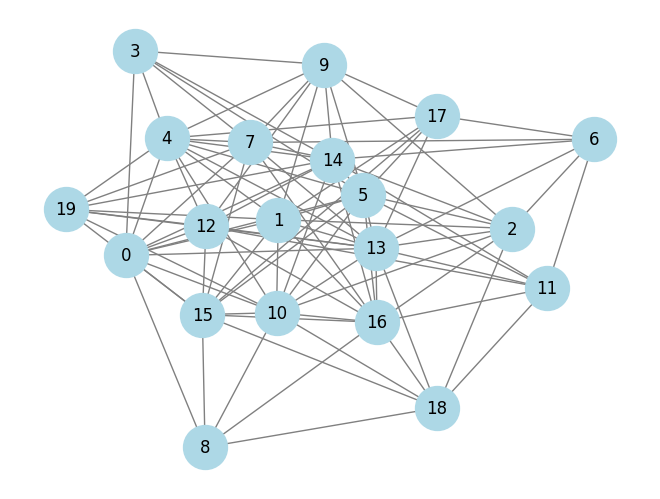

In [2]:
# Numero de nodos

n = 20

# Crea un grafo vacío

G = nx.Graph()
    
# Agrega n nodos al grafo
    
G.add_nodes_from(range(n))
    
# Agrega aristas aleatorias al grafo
    
for i in range(n):
    for j in range(i+1, n):
        if random.random() < 0.5:
            G.add_edge(i, j)
    
# Comprueba si el grafo es conexo

if not nx.is_connected(G):
        
    # Si el grafo no es conexo, intenta agregar más aristas aleatorias
    
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < 0.5:
                G.add_edge(i, j)
                
            # Si el grafo se vuelve conexo, detén el bucle
            
            if nx.is_connected(G):
                break
        else:
            continue
        break
    
    # Devuelve el grafo generado
    
nx.draw(G, with_labels=True, node_size=1000, node_color='lightblue', edge_color='gray')
    

**Función QUBO**

In [3]:
# Creamos una variable binaria por cada nodo de nuestro grafo

x = {n: Binary(n) for n in G.nodes}

# Implementamos nuestra función QUBO que no posee restricciones

bqm = sum(-x[i]-x[j]+2*x[i]*x[j] for i,j in G.edges)

In [4]:
# Realizamos la prueba en un cuantico real para comprobar como el grafo original se embebe en la topologia chimera de D-Wave

num_samples = 1000
sampler = LazyFixedEmbeddingComposite(DWaveSampler())
sampleset = sampler.sample(bqm, num_reads=num_samples)   

# Obtenemos de igual forma los resultados optimos

solution = sampleset.first.sample
energy = sampleset.first.energy
print(f"La solución óptima es {solution} con energía {energy}")

# La funcionalidad inspector nos permite visualizar como se embebe el grafo en la topologia de nuestra QPU

#dwave.inspector.show(sampleset)       

La solución óptima es {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 1, 9: 0, 10: 1, 11: 0, 12: 1, 13: 1, 14: 1, 15: 0, 16: 0, 17: 1, 18: 1, 19: 0} con energía -63.0


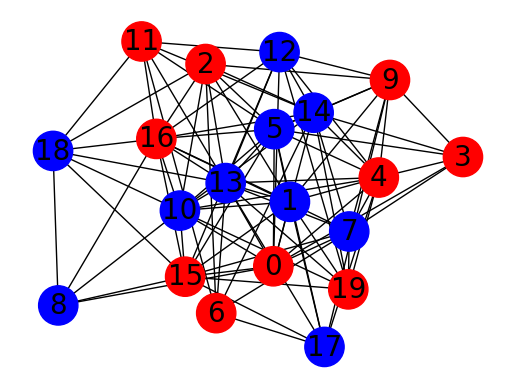

In [5]:
def color_nodes(G, solution):
    # Crear un diccionario que asocie a cada nodo su color
    
    node_color = {node: 'r' if solution[node] == 0 else 'b' for node in G.nodes()}

    # Dibujar el grafo
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color=node_color.values(), node_size=800)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.axis('off')
    plt.show()


color_nodes(G,solution)